Suppose that we are in the data science team for an orange juice company. In the meeting, the marketing team claimed that their new marketing strategy resulted in an increase of sales. The management team asked us to determine if the claims made by marketing are true.

This is the data from January and February. 

+ Average Daily Sales in January = \$10,000, sample size = 31, variance = 10,000,000
+ Average Daily Sales in February = \$12,000, sample size = 28, variance = 20,000,000

<b>How do we know that the increase in daily orange juice sales was not due to random variation in data?</b>

### The Hypothesis

The amount of sales per day is not consistent throughout the month. The January data has a variance of 10,000,000 and a standard deviation of ~3162. On bad days, we would sell \$8,000 of orange juice. On good days, we would sell $14,000 of orange juice. We have to prove that the increase in average daily sales in February did not occur purely by chance.

The null hypothesis would be:

$ H_0 : \mu_0 = \text{\$10,000} $

There are three possible alternative hypothesis:

1. $ H_a : \mu_1 > \text{\$10,000}$
2. $ H_a : \mu_1 < \text{\$10,000}$
3. $ H_a : \mu_1 \ne \text{\$10,000}$

Where $\mu$ is the average daily sales. If we are interested in concluding that the average daily sales is greater than \$10,000, then we would go with the first alternative hypothesis. If we are interested in concluding that the average daily sales is less than \$10,000, then we would go with the second alternative hypothesis. If we are interested in concluding that the average daily sales differs from \$10,000, then we would go with the third alternative hypothesis.

In our case, the marketing department claimed that the sales has increased. So we would use the first alternative hypothesis.

### Type I and II Errors

We have to determine whether we accept or reject the null hypothesis. This could result in four different outcomes.

1. Retained the null hypothesis, and the null hypothesis was correct. (No error)
2. Retained the null hypothesis, but the alternative hypothesis was correct. (Type II error, false negative)

3. Rejected the null hypothesis, but the null hypothesis was correct. (Type I error, false positive)
4. Rejected the null hypothesis, and the alternative hypothesis was correct. (No error)

Hypothesis testing uses the same logic as a court trial.  The null hypothesis(defendent) is innocent until proven guilty. We use data as evidence to determine if the claims made against the null hypothesis is true.


### Significance Level

In order to come to a decision, we would have to calculate the probability of getting an average daily sales of \$12,000 due to random chance. If this probability is high, we would retain the null hypothesis. If this probability is low, we would reject the null hypothesis. This probability threshold known as the <b>significance level, or $\alpha$</b>. Many statisticians typically use $\alpha$ = 0.05.

To visualize this using the normal distribution, recall that we've chosen to prove that $\mu_1 > \mu_0$. This is called a <b>right-tailed test</b>.

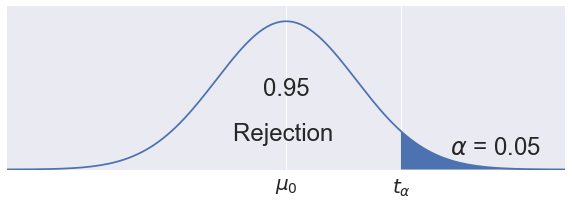

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from scipy.integrate import simps
%matplotlib inline

#The Gaussian Function
def g(x):
    return 1/(math.sqrt(1**math.pi))*np.exp(-1*np.power((x - 0)/1, 2)/2)

fig = plt.figure(figsize=(10,3))
x = np.linspace(-300, 300, 10000)
sns.set(font_scale=2)

#Draws the gaussian curve
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, g(x))
ax.set_ylim(bottom = 0, top = 1.1)
ax.set_xlim(left = -4, right = 4)
ax.set_yticks([])
plt.xticks([0, 1.645], 
               [r'$\mu_0$', r'$t_\alpha$']
              )
    
#Fills the area under the curve
section = np.arange(1.645, 300, 1/2000)
ax.fill_between(section, g(section))

#Calculates the area under the curve using Simpson's Rule
x_range = np.linspace(1.645, 300, 2000)
y_range = g(x_range) 
area_total = simps(g(x), x)
area_part = simps(y_range , x_range)
percent_data = np.round((area_part/area_total), 2)
ax.annotate(r'$\alpha$ = {}'.format(percent_data), xy=(3, 0.1), ha='center')
ax.annotate('{}'.format(1-percent_data), xy=(0, 0.5), ha='center')
ax.annotate('Rejection '.format(1-percent_data), xy=(0, 0.2), ha='center')
plt.show()

We don't know where the data from February is on this distribution. That is something we have to calculate. If we find more than 5% of the February data in the rejection region, this means that we reject the alternative hypothesis and retain the null hypothesis. If we end up in the alpha region. The null hypothesis is rejected, and we are 95% confident about our decision, leaving a 5% chance for a type I error.

If our alternative hypothesis was $\mu_1 < \mu_0$, then we would have to use a <b>left-tailed test</b>, which is simply the flipped veresion of the right-tailed test.

If our alternative hypothesis was $\mu_1 \ne \mu_0$, then we would have to use a <b>two-tailed test</b>, which is both the left and right tailed test combined with $\alpha$ = 0.025.

### The Welch's t-test

One way to tackle this problem is to calculate the probability of finding February data in the rejection region using the Welch's t-test. This version of the t-test can be used for equal or unequal sample sizes. In addition, this t-test can be used for two samples with different variances. This is often praised as the most robust form of the t-test. However, the Welch's t-test assumes that the two samples of data are independent and identically distributed.

The t-score can be calculated using the following formula:

$$ t_{score} = \frac {\bar {X}_1 - \bar {X}_2} {s_{Welch}}$$

$$ s_{Welch}  = \sqrt{\frac{s^2_1} {n_1}+\frac{s^2_2} {n_2}} $$

The degrees of freedom can be calculated using the following formula:

$$ DoF = \frac{\bigg({\frac{s^2_1} {n_1}+\frac{s^2_2} {n_2}}\bigg)^2} {\frac{({s^2_1}/{n_1})^2}{n_1-1} + \frac{({s^2_2}/{n_2})^2}{n_2-1}}$$

Where $\bar {X}$ is the sample average, $s$ is the variance, and $n$ is the sample size. With the degrees of freedom and the t-score, we can simply use a t-table or a t-distribution calculator to determine the probability of getting an average daily sales of \$12,000 due to random chance. This probability is known as the <b>p-value</b>. If the p-value is less than the significance level, then we can conclude that our data is statistically significant. As a result, the null hypothesis will be rejected.

We could calculate the t-score and the degrees of freedom by plugging in every number into python, and then looking up a t-table. But it is easier to just use the scipy.states module. Click [here](https://docs.scipy.org/doc/scipy/reference/stats.html) for the link to the documentation.

In [2]:
from scipy.stats import ttest_ind_from_stats

t_score = ttest_ind_from_stats(mean1=12000, std1=np.sqrt(10000000), nobs1=31, \
                               mean2=10000, std2=np.sqrt(20000000), nobs2=28, \
                               equal_var=False)
t_score

Ttest_indResult(statistic=1.9641226483541647, pvalue=0.05531232625026703)

From the Welch's t-test we ended up with a p-value of 0.055. Scipy calculates this value based on the two tailed case. If we just want the p-value of the right-tail, we can divide this value by 2. This means that the probability that there is a ~2.57% chance of finding the observed values from February in the rejection region. So we are 97.43% confident that the alternative hypothesis is correct. In conclusion, we will reject the null hypothesis.

### The Welch's t-test with Facebook Data

Let's try using real data this time. I've taken data from UCI's machine learning repository. Click [here](https://archive.ics.uci.edu/ml/datasets/Facebook+metrics) for the link to the documentation and citation. In summary, 
the data is related to 'posts' published during the year of 2014 on the Facebook's page of a renowned cosmetics brand. 

Suppose our cosmetics company wants more skin in the digital marketing game. We are interested in using Facebook as a platform to advertise our company. Let's start with some simple data exploration.

In [3]:
import pandas as pd
data = pd.read_csv('dataset_Facebook.csv', delimiter=';')
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


We are interested in knowing the amount of likes a 'Paid' post gets vs. an "Unpaid" post. Let's start with some histograms and descriptive statistics.

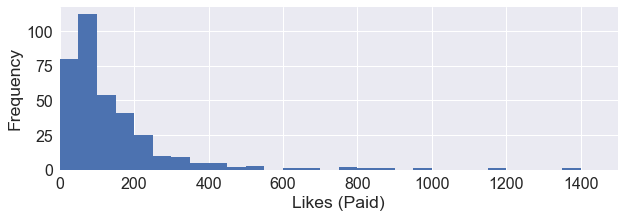

sample_size: 360
sample_mean: 155.84679665738162
sample_variance: 48403.23623970993


In [4]:
unpaid_likes = data[data['Paid']==0]['like']
sns.set(font_scale=1.6)
fig = plt.figure(figsize=(10,3))
ax=unpaid_likes.hist(range=(0, 1500),bins=30)
ax.set_xlim(0,1500)

plt.xlabel('Likes (Paid)')
plt.ylabel('Frequency')
plt.show()

print('sample_size: {}'.format(unpaid_likes.shape[0]))
print('sample_mean: {}'.format(unpaid_likes.mean()))
print('sample_variance: {}'.format(unpaid_likes.var()))

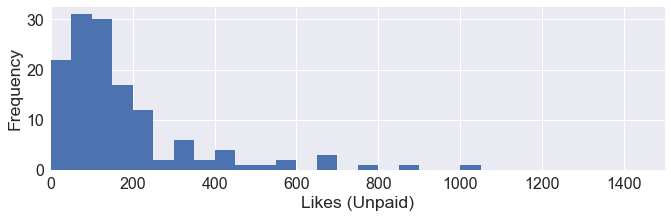

sample_size: 139
sample_mean: 235.6474820143885
sample_variance: 247175.07048274425


In [5]:
paid_likes = data[data['Paid']==1]['like']
fig = plt.figure(figsize=(11,3))
ax=paid_likes.hist(range=(0, 1500),bins=30)
ax.set_xlim(0,1500)

plt.xlabel('Likes (Unpaid)')
plt.ylabel('Frequency')
plt.show()

print('sample_size: {}'.format(paid_likes.shape[0]))
print('sample_mean: {}'.format(paid_likes.mean()))
print('sample_variance: {}'.format(paid_likes.var()))

We immediately notice that the sample mean of 'likes' in paid posts was higher than the sample mean of 'likes' in unpaid posts. We need to determine if the data we have is statistically significant. 

The null hypothesis would suggest that paying for advertisements does not increase the amount of likes.

$$ H_0 : \mu_0 = \text{139 likes} $$

The alternative hypothesis would suggest that paying for advertisements does increase the amount of likes.

$$ H_a : \mu_1 > \text{139 likes}$$

We can come to a decision using the right-tailed Welch's t-test again. This time, we'll calculate the p-value in using the formulas in the previous section instead of the scipy module.

In [6]:
s_welch = np.sqrt(paid_likes.var()/paid_likes.shape[0] + unpaid_likes.var()/unpaid_likes.shape[0])
t=(paid_likes.mean()-unpaid_likes.mean())/s_welch
print('t-value: {}'.format(t))

t-value: 1.8246693381852654


In [7]:
df_num = (paid_likes.var()/paid_likes.shape[0] + unpaid_likes.var()/unpaid_likes.shape[0])**2
df_dem = (
    (paid_likes.var()/paid_likes.shape[0])**2/(paid_likes.shape[0]-1)) + \
    (unpaid_likes.var()/unpaid_likes.shape[0])**2/(unpaid_likes.shape[0]-1)
df = df_num/df_dem
print('degrees of freedom: {}'.format(df))

degrees of freedom: 159.30733891825585


According to the [t-table](https://www.stat.tamu.edu/~lzhou/stat302/T-Table.pdf), we only need a t-score of 1.658 and degrees of freedom of at least 120 to get a p-value of 0.05. We can be at least 95% confident in rejecting the null hypothesis.

Next, we'll use scipy again to determine the exact p-value.

In [8]:
from scipy.stats import ttest_ind_from_stats

t_score = ttest_ind_from_stats(paid_likes.mean(), paid_likes.std(), paid_likes.shape[0], \
                               unpaid_likes.mean(), unpaid_likes.std(), unpaid_likes.shape[0], \
                               equal_var=False)
t_score

Ttest_indResult(statistic=1.8246693381852654, pvalue=0.06992430563915134)

From the Welch's t-test we ended up with a two-tailed p-value of ~0.07. This means that the probability that there is a ~3.5% chance of finding the observed values from the "paid" posts in the rejection region. So we are 96.5% confident that the alternative hypothesis is correct. In conclusion, we will reject the null hypothesis and consider investing in Facebook advertisements based on our data.

---

The files used for this article can be found in my [GitHub repository](https://github.com/sengkchu/codingdisciple.content/tree/master/Learning%20data%20science/Learning/Understanding%20Descriptive%20Statistics/Hypothesis%20Testing).